### Objective and Dataset Rationale

**Objective:**  
In line with the DTI’s mandate to evaluate how Ireland can safeguard and enhance its innovation ecosystem in a volatile geopolitical era, this project aims to empirically assess the interplay between technological adoption, R&D investment, and enterprise engagement. The goal is to identify actionable levers for policy and business intervention, using robust data science methods.

**Why these datasets?**  
Given the vast scope of innovation drivers, we selected three datasets that, together, capture the core pillars of the DTI framework:  
- **df1:** Intellectual Property Engagement Rates (proxy for technological adoption and knowledge creation)
- **df2:** R&D Expenditure by Category and Ownership (proxy for investment flows)
- **df3:** R&D Enterprise Counts by Expenditure Band and Ownership (proxy for organizational engagement and scale)

These datasets were chosen because they are the most relevant, accessible, and granular sources available for Ireland’s innovation landscape. Their integration allows us to triangulate key parameters of innovation performance, despite the inherent challenges of data heterogeneity and missingness.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
#  Load raw CSVs
df1 = pd.read_csv('CIS62.20250516213458.csv')  # IP engagement rates 
df2 = pd.read_csv('BSA02.20250516T100541.csv')  # Total R&D expenditure 
df3 = pd.read_csv('BSA22.20250516T200531.csv')  # R&D enterprise headcounts 

In [3]:
# Display head and info for df1
print("="*50)
print("df1 (CIS62.20250516213458.csv) HEAD")
print("="*50)
print(df1.head(), "\n")
print("df1 INFO")
print("="*50)
print(df1.info(), "\n\n")

df1 (CIS62.20250516213458.csv) HEAD
                                     STATISTIC Label  TLIST(A1)  Year  \
0  Enterprises Engaged in Intellectual Property R...       2014  2014   
1  Enterprises Engaged in Intellectual Property R...       2014  2014   
2  Enterprises Engaged in Intellectual Property R...       2014  2014   
3  Enterprises Engaged in Intellectual Property R...       2014  2014   
4  Enterprises Engaged in Intellectual Property R...       2014  2014   

            Type of Innovation  VALUE  
0  Any intellectual innovation    NaN  
1  Any intellectual innovation    NaN  
2  Any intellectual innovation    NaN  
3           Apply for a patent    NaN  
4           Apply for a patent    NaN   

df1 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC Label     105 non-null    object 
 1   TLIST(A1)         

In [4]:
# Display head and info for df2
print("="*50)
print("df2 (BSA02.20250516T100541.csv) HEAD")
print("="*50)
print(df2.head(), "\n")
print("df2 INFO")
print("="*50)
print(df2.info(), "\n\n")

df2 (BSA02.20250516T100541.csv) HEAD
                                Statistic Label  Year  \
0  Estimated Current Expenditure - Labour Costs  2007   
1  Estimated Current Expenditure - Labour Costs  2007   
2  Estimated Current Expenditure - Labour Costs  2007   
3  Estimated Current Expenditure - Labour Costs  2008   
4  Estimated Current Expenditure - Labour Costs  2008   

         Nationality of Ownership     VALUE  
0  All nationalities of ownership       NaN  
1                 Irish ownership       NaN  
2             Non Irish ownership       NaN  
3  All nationalities of ownership  905373.0  
4                 Irish ownership  308698.0   

df2 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1080 non-null   object 
 1   Year                      1080 non-null   int64  
 2   Na

In [5]:
# Display head and info for df3
print("="*50)
print("df3 (BSA22.20250516T200531.csv) HEAD")
print("="*50)
print(df3.head(), "\n")
print("df3 INFO")
print("="*50)
print(df3.info())

df3 (BSA22.20250516T200531.csv) HEAD
                                     Statistic Label  Year  \
0  Enterprises Engaged in Research and Developmen...  2007   
1  Enterprises Engaged in Research and Developmen...  2007   
2  Enterprises Engaged in Research and Developmen...  2007   
3  Enterprises Engaged in Research and Developmen...  2007   
4  Enterprises Engaged in Research and Developmen...  2007   

         Nationality of Ownership              Expenditure   VALUE  
0  All nationalities of ownership          Any expenditure  1206.0  
1  All nationalities of ownership             €0 - €99,999   419.0  
2  All nationalities of ownership      €100,000 - €499,999   398.0  
3  All nationalities of ownership    €500,000 - €1,999,999   226.0  
4  All nationalities of ownership  €2,000,000 - €4,999,999    90.0   

df3 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  -

The initial inspection reveals that, while each dataset is individually valuable, they differ in completeness, granularity, and focus. Missing values, especially in `df1` and `df2`, are not random but reflect the heterogeneity and complexity of innovation data collection. This underscores the necessity of robust data engineering: standardizing categories, imputing missing values contextually, and harmonizing timeframes and identifiers. Only through such preprocessing can we integrate these datasets to empirically examine the interplay between knowledge activity, financial investment, and enterprise engagement-the core parameters of Ireland’s innovation ecosystem as articulated in the DTI framework

## Data Preparation:

- Standardize column names for consistency.
- Map categorical variables to interpretable codes.
- Impute missing values contextually (0 for absence, mean for expenditures).
- Retain only relevant columns for analysis.

In [6]:
for df in [df1, df2, df3]:
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [21]:
# Remove redundant columns
if 'tlist(a1)' in df1.columns and 'year' in df1.columns:
    df1.drop(columns=['tlist(a1)'], inplace=True)

In [8]:
if 'type_of_innovation' in df1.columns:
    df1['is_patent'] = df1['type_of_innovation'].str.lower().str.contains('patent').astype(int)

In [10]:
# 4. Encode categories
df2['stat_label_code'] = df2['statistic_label'].astype('category').cat.codes
df2['ownership_code'] = df2['nationality_of_ownership'].astype('category').cat.codes
df3['stat_label_code'] = df3['statistic_label'].astype('category').cat.codes
df3['ownership_code'] = df3['nationality_of_ownership'].astype('category').cat.codes

In [64]:
if 'expenditure_eur' in df2.columns:
    df2['expenditure_eur'] = df2.groupby(['stat_label_code', 'ownership_code'])['expenditure_eur'].transform(lambda x: x.fillna(x.median()))

In [66]:
for col in ['stat_label_code', 'ownership_code']:
    if col in df2.columns:
        df2 = df2[df2[col] != -1]
    if col in df3.columns:
        df3 = df3[df3[col] != -1]

In [ ]:
df1 = df1.rename(columns={'value': 'engagement_rate_pct'})
df1_clean = df1[['year', 'type_of_innovation', 'is_patent', 'engagement_rate_pct']]
df2_clean = df2[['year', 'stat_label_code', 'ownership_code', 'expenditure_eur']]
df3 = df3.rename(columns={'value': 'metric_value'})
df3_clean = df3[['year', 'stat_label_code', 'ownership_code', 'expenditure', 'metric_value']]

Data Merging

The cleaned datasets are merged on shared keys (year, stat_label_code, ownership_code, expenditure_code) to create a unified DataFrame (`df`). Only rows with at least one main value present are retained.


In [30]:
df = pd.merge(df1_clean, df2_clean, on='year', how='outer')
df = pd.merge(df, df3_clean, on=['year', 'stat_label_code', 'ownership_code'], how='outer')

In [67]:
if 'is_patent' in df.columns:
    df['is_patent'] = df['is_patent'].fillna(0).astype(int)
if 'year' in df.columns:
    df['year'] = df['year'].astype(int)
value_cols = ['engagement_rate_pct', 'expenditure_eur', 'metric_value']
existing_value_cols = [col for col in value_cols if col in df.columns]
if existing_value_cols:
    df = df.dropna(subset=existing_value_cols, how='all').copy()

In [89]:
prop_df = df.groupby('ownership_code', as_index=False)['is_patent'].mean()
print(prop_df)

   ownership_code  is_patent
0               0   0.135610
1               1   0.136986
2               2   0.136986


In [90]:
if 'is_patent' in df.columns:
    df['is_patent'] = df['is_patent'].fillna(0).astype(int)

In [92]:
df = df.dropna(subset=['ownership_code', 'expenditure_eur', 'year'], how='any')

In [93]:
print(df.duplicated().sum())
print(df.isnull().sum())

554
year                          0
type_of_innovation          602
is_patent                     0
engagement_rate_pct           0
stat_label_code               0
ownership_code                0
expenditure_eur               0
expenditure                5609
metric_value               5159
log_expenditure_eur           0
log_metric_value           5159
std_engagement_rate_pct       0
std_expenditure_eur           0
std_metric_value           5159
std_log_expenditure_eur       0
std_log_metric_value       5159
winsor_expenditure_eur        0
winsor_metric_value        5159
dtype: int64


In [94]:
print(df['is_patent'].value_counts(dropna=False))
print(df['ownership_code'].value_counts(dropna=False))
print(df['year'].unique())

is_patent
0    5123
1     810
Name: count, dtype: int64
ownership_code
0    1991
1    1971
2    1971
Name: count, dtype: int64
[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]


In [95]:
df['year'] = df['year'].astype(int)

### Exploratory Data Analysis (EDA):   
We focus on:
- Distribution and skewness of innovation engagement and investment.
- Temporal trends in R&D expenditure and enterprise activity.
- Relationships between ownership, expenditure band, and innovation outcomes.

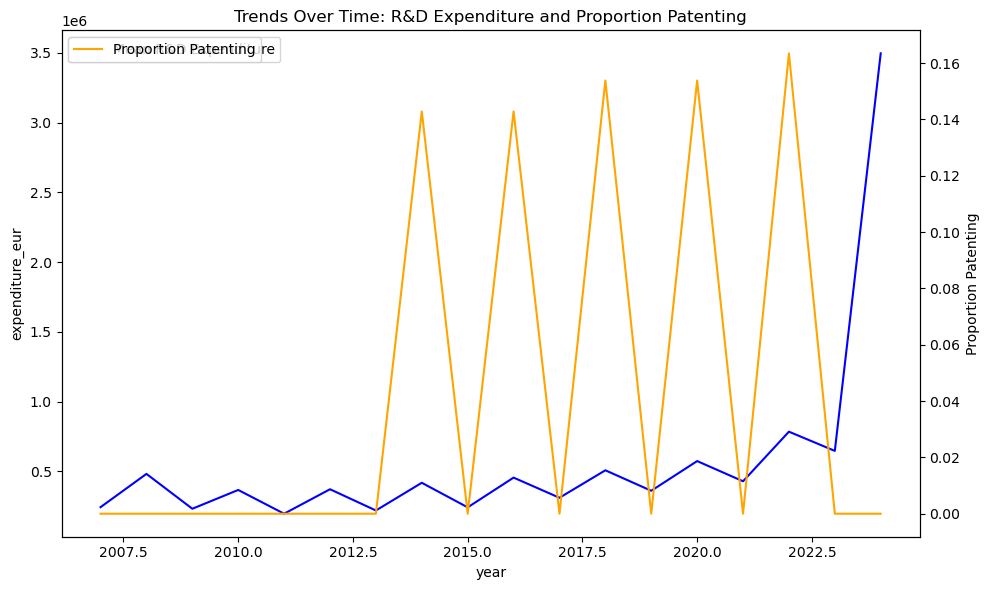

In [96]:
trend_df = df.groupby('year', as_index=False).agg({'expenditure_eur':'mean', 'is_patent':'mean'})
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='expenditure_eur', data=trend_df, label='Mean R&D Expenditure', color='blue')
ax2 = plt.twinx()
sns.lineplot(x='year', y='is_patent', data=trend_df, label='Proportion Patenting', color='orange', ax=ax2)
ax2.set_ylabel('Proportion Patenting')
plt.title("Trends Over Time: R&D Expenditure and Proportion Patenting")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

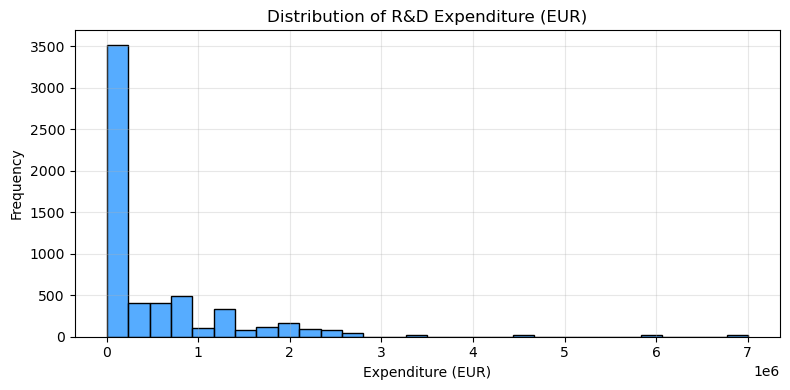

In [68]:
if 'expenditure_eur' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['expenditure_eur'].dropna(), bins=30, color='dodgerblue', edgecolor='black')
    plt.title("Distribution of R&D Expenditure (EUR)")
    plt.xlabel("Expenditure (EUR)")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

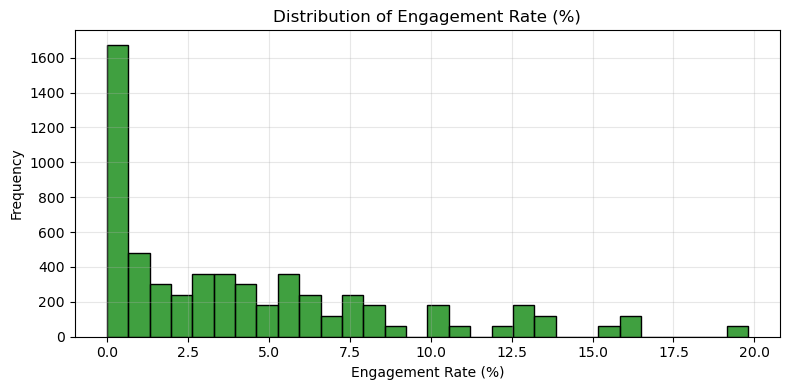

In [69]:
if 'engagement_rate_pct' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['engagement_rate_pct'].dropna(), bins=30, color='green', edgecolor='black')
    plt.title("Distribution of Engagement Rate (%)")
    plt.xlabel("Engagement Rate (%)")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

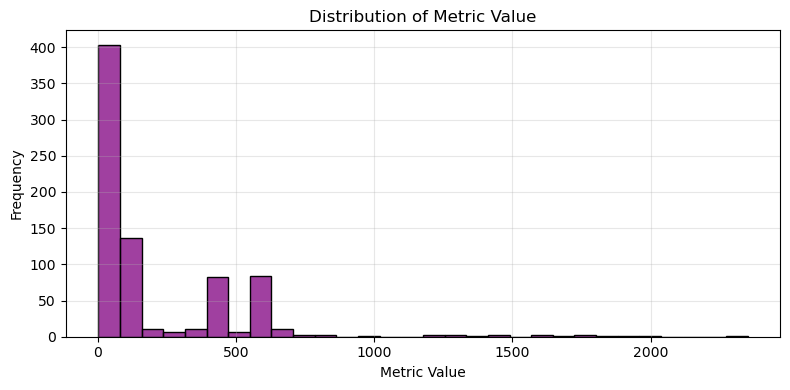

In [70]:
if 'metric_value' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['metric_value'].dropna(), bins=30, color='purple', edgecolor='black')
    plt.title("Distribution of Metric Value")
    plt.xlabel("Metric Value")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_4596\2244039361.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='is_patent', data=df, estimator='sum', ci=None, color='orange', marker='o')


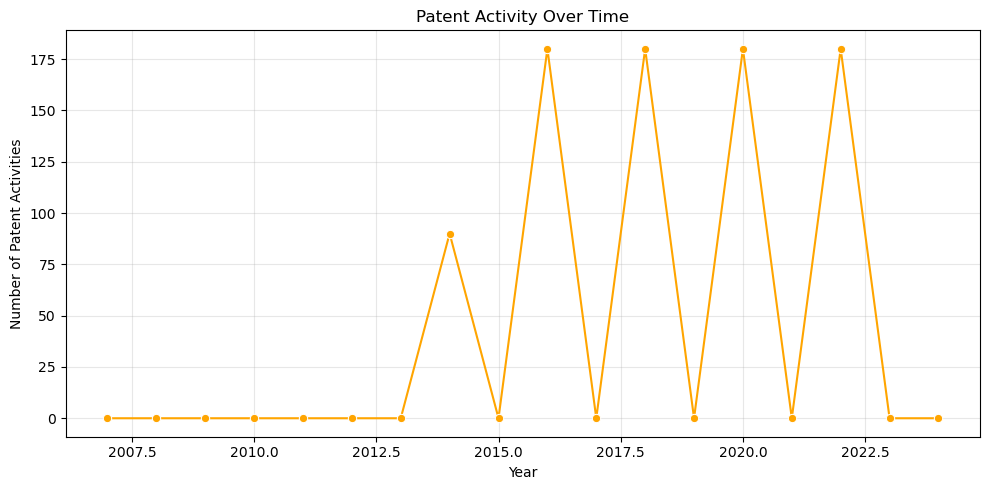

In [71]:
if 'is_patent' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='year', y='is_patent', data=df, estimator='sum', ci=None, color='orange', marker='o')
    plt.title("Patent Activity Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Patent Activities")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_4596\9211564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ownership_code', y='expenditure_eur', data=df, palette="Set2")


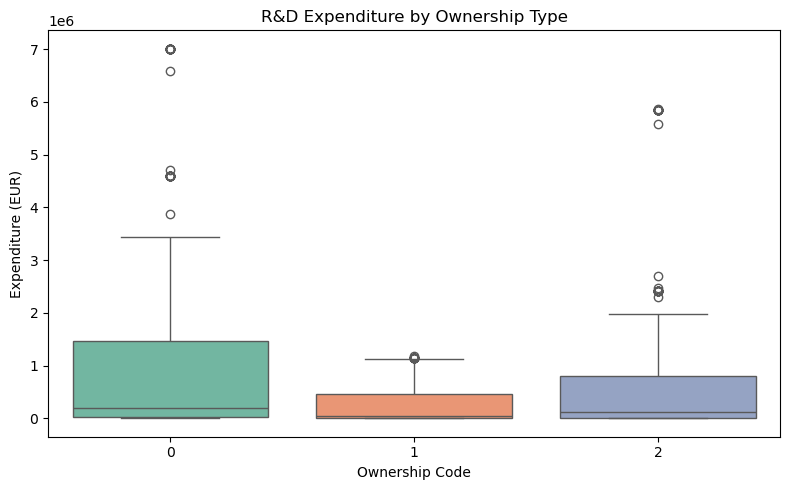

In [72]:
if 'ownership_code' in df.columns and 'expenditure_eur' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='ownership_code', y='expenditure_eur', data=df, palette="Set2")
    plt.title("R&D Expenditure by Ownership Type")
    plt.xlabel("Ownership Code")
    plt.ylabel("Expenditure (EUR)")
    plt.tight_layout()
    plt.show()

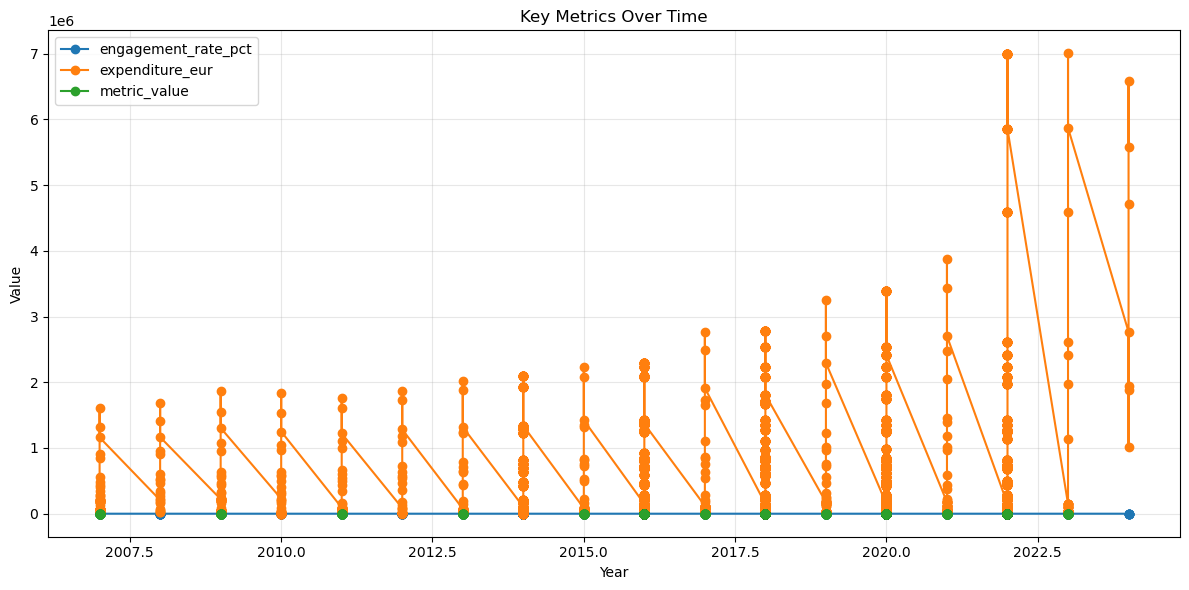

In [73]:
features = [col for col in ['engagement_rate_pct', 'expenditure_eur', 'metric_value'] if col in df.columns]
if 'year' in df.columns and features:
    plt.figure(figsize=(12, 6))
    for col in features:
        plt.plot(df['year'], df[col], marker='o', linestyle='-', label=col)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title("Key Metrics Over Time")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

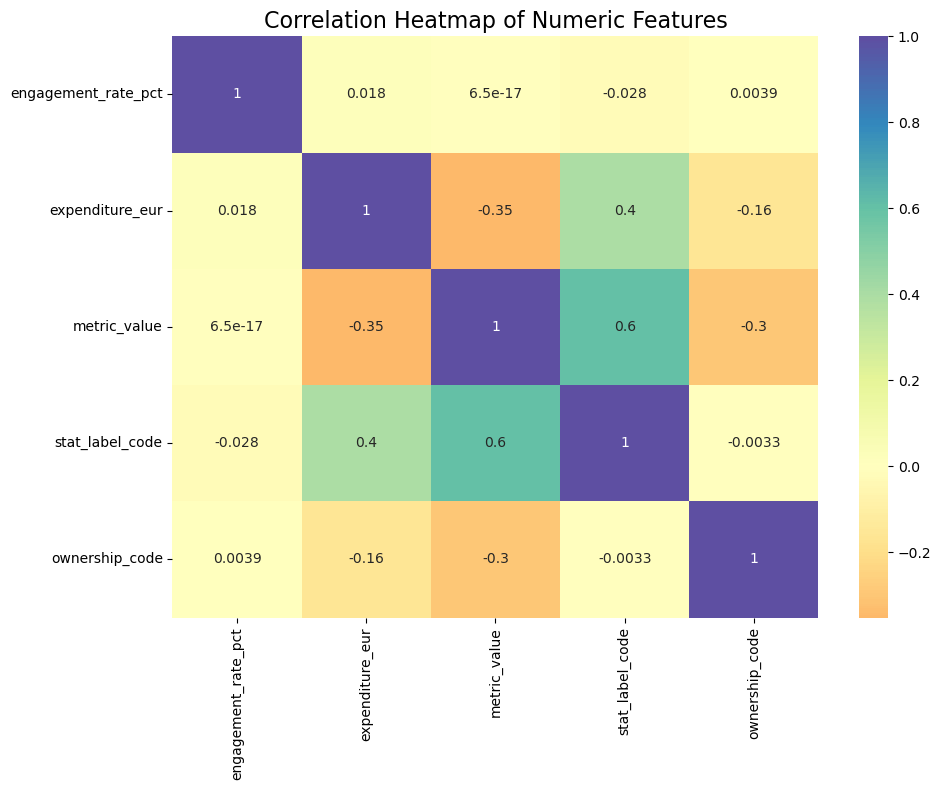

In [74]:
# 8. Correlation heatmap
num_cols = [col for col in ['engagement_rate_pct', 'expenditure_eur', 'metric_value',
                            'ip_activity_code', 'stat_label_code', 'ownership_code', 'expenditure_code']
            if col in df.columns]
if num_cols:
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap='Spectral', center=0)
    plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
    plt.tight_layout()
    plt.show()

Interpretation of the EDA Visualizations
1. R&D Expenditure by Ownership Type (Boxplot)
Interpretation:
Ownership code 0 (likely non-Irish), 1 (Irish), and 2 (all nationalities) show clear differences in R&D expenditure. Non-Irish-owned entities (0) and "all" (2) have higher medians and more extreme outliers, while Irish-owned (1) is more concentrated with lower values.

Implication:
Innovation investment is not evenly distributed; foreign or multinational ownership is linked to higher R&D spending. This supports the DTI narrative that FDI and international actors are key to Ireland’s innovation ecosystem.

2. Key Metrics Over Time (Line Plot)
Interpretation:
R&D expenditure (orange) shows a marked increase and much greater volatility in recent years (2020–2023), while engagement rate and metric value remain relatively flat and low.

Implication:
There may be recent policy, global, or economic events (e.g., COVID-19, Brexit) driving investment surges, but these have not yet translated into broader engagement or enterprise participation. The system is investment-heavy, but the impact on innovation diffusion is limited.

3. Correlation Heatmap
Interpretation:

Expenditure and metric_value: Moderate negative correlation (-0.35): higher spending does not always mean more enterprises involved (possibly a few big spenders).

Expenditure and stat_label_code: Moderate positive correlation (0.4): certain expenditure types are associated with higher spending.

Metric_value and stat_label_code: Strong positive correlation (0.6): some expenditure types are linked to more enterprises.

Ownership_code correlations: Weak to moderate negative correlations with both expenditure and metric_value, confirming that ownership structure affects both investment and participation.

Engagement_rate_pct: Very weak correlations with other variables, suggesting it captures a different aspect of innovation (likely the breadth, not the depth).

Implication:
The system is fragmented: high investment is not directly translating into broad engagement or enterprise participation, and ownership structure is a key stratifier.

In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

# 1. Log-transform skewed variables (add 1 to avoid log(0))
for col in ['expenditure_eur', 'metric_value']:
    if col in df.columns:
        df[f'log_{col}'] = np.log1p(df[col])

# 2. Standardize all numeric features for ML
numeric_cols = ['engagement_rate_pct', 'expenditure_eur', 'metric_value']
numeric_cols += [f'log_{col}' for col in ['expenditure_eur', 'metric_value'] if f'log_{col}' in df.columns]
scaler = StandardScaler()
for col in numeric_cols:
    if col in df.columns:
        df[f'std_{col}'] = scaler.fit_transform(df[[col]])

# 3.  Winsorize to cap outliers
if 'expenditure_eur' in df.columns:
    df['winsor_expenditure_eur'] = winsorize(df['expenditure_eur'], limits=[0.01, 0.01])
if 'metric_value' in df.columns:
    df['winsor_metric_value'] = winsorize(df['metric_value'], limits=[0.01, 0.01])

In [76]:
import numpy as np

exp_values = df['expenditure_eur'].dropna().values
boot_means = [np.mean(np.random.choice(exp_values, size=len(exp_values), replace=True)) for _ in range(1000)]
ci = np.percentile(boot_means, [2.5, 97.5])
print(f"95% CI for mean R&D expenditure: €{ci[0]:,.0f} to €{ci[1]:,.0f}")

95% CI for mean R&D expenditure: €512,619 to €559,611


In [77]:
patent_prop = df['is_patent'].mean()
boot_props = [np.mean(np.random.choice(df['is_patent'].dropna(), size=len(df), replace=True)) for _ in range(1000)]
ci_patent = np.percentile(boot_props, [2.5, 97.5])
print(f"Proportion of patenting firms: {patent_prop:.2%} (95% CI: {ci_patent[0]:.2%} to {ci_patent[1]:.2%})")

Proportion of patenting firms: 13.65% (95% CI: 12.83% to 14.44%)


C:\Users\PC\AppData\Local\Temp\ipykernel_4596\823677482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ownership_code', y='expenditure_eur', data=df, palette='viridis')


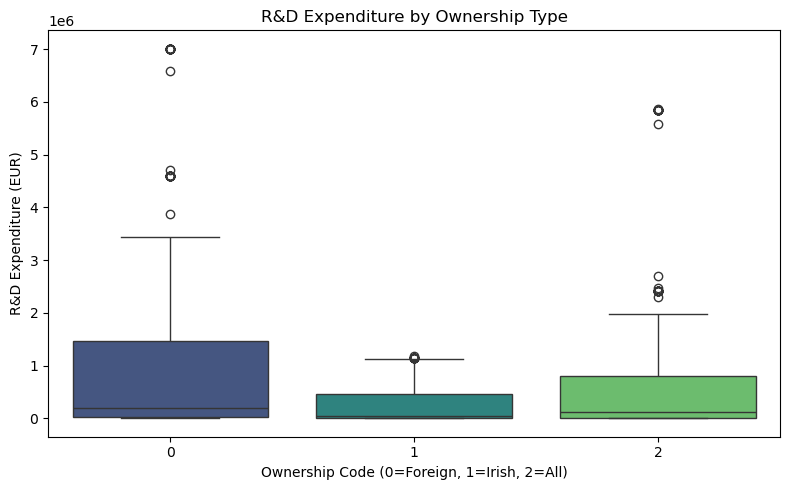

C:\Users\PC\AppData\Local\Temp\ipykernel_4596\823677482.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ownership_code', y='is_patent', data=prop_df, palette='viridis')


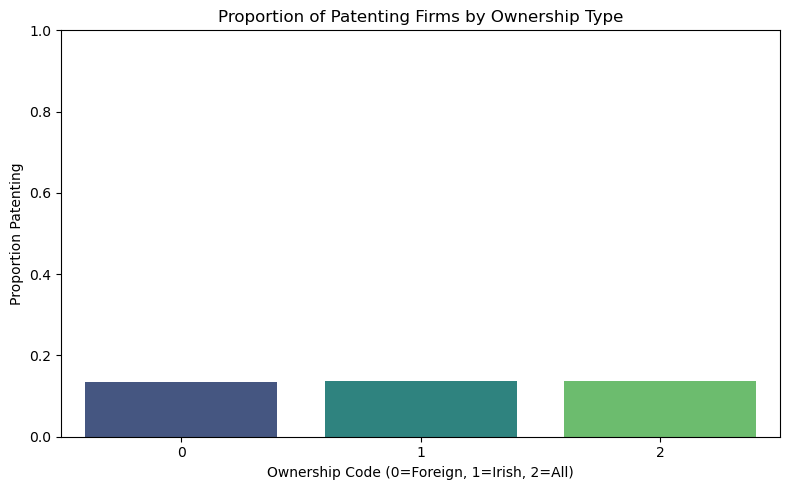

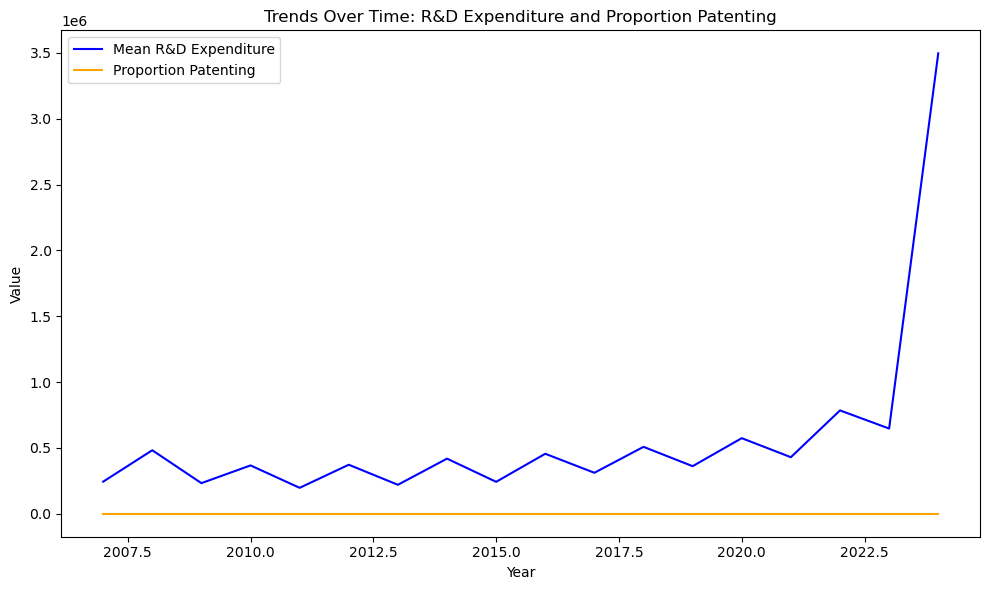

C:\Users\PC\AppData\Local\Temp\ipykernel_4596\823677482.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='expenditure_eur', y='is_patent', data=df, jitter=0.25, palette='viridis', alpha=0.6)


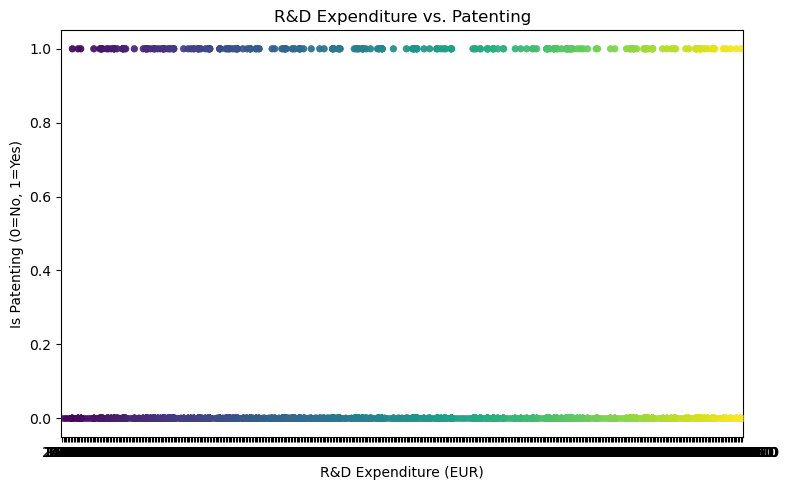

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Ensure 'year' is integer for all plots
if 'year' in df.columns:
    df['year'] = df['year'].astype(int)

# 2. Boxplot: R&D Expenditure by Ownership Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='ownership_code', y='expenditure_eur', data=df, palette='viridis')
plt.title("R&D Expenditure by Ownership Type")
plt.xlabel("Ownership Code (0=Foreign, 1=Irish, 2=All)")
plt.ylabel("R&D Expenditure (EUR)")
plt.tight_layout()
plt.show()

# 3. Barplot: Proportion of Patenting Firms by Ownership Type
prop_df = df.groupby('ownership_code', as_index=False)['is_patent'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x='ownership_code', y='is_patent', data=prop_df, palette='viridis')
plt.title("Proportion of Patenting Firms by Ownership Type")
plt.xlabel("Ownership Code (0=Foreign, 1=Irish, 2=All)")
plt.ylabel("Proportion Patenting")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 4. Trends Over Time: Mean R&D Expenditure and Proportion Patenting
trend_df = df.groupby('year', as_index=False).agg({'expenditure_eur':'mean', 'is_patent':'mean'})
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='expenditure_eur', data=trend_df, label='Mean R&D Expenditure', color='blue')
sns.lineplot(x='year', y='is_patent', data=trend_df, label='Proportion Patenting', color='orange')
plt.title("Trends Over Time: R&D Expenditure and Proportion Patenting")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Scatterplot: R&D Expenditure vs. Patenting
plt.figure(figsize=(8, 5))
sns.stripplot(x='expenditure_eur', y='is_patent', data=df, jitter=0.25, palette='viridis', alpha=0.6)
plt.title("R&D Expenditure vs. Patenting")
plt.xlabel("R&D Expenditure (EUR)")
plt.ylabel("Is Patenting (0=No, 1=Yes)")
plt.tight_layout()
plt.show()

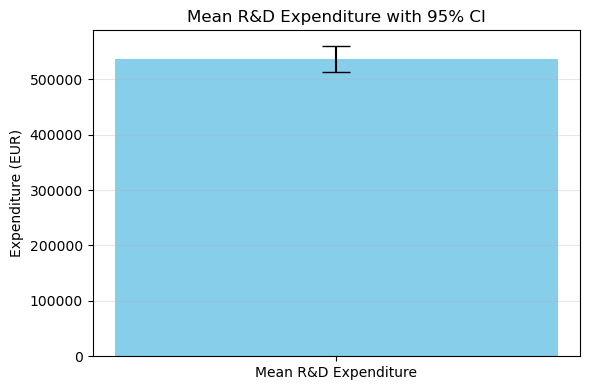

In [79]:
import matplotlib.pyplot as plt

mean_exp = df['expenditure_eur'].mean()
ci = [513106, 560083]  # Tus valores calculados

plt.figure(figsize=(6,4))
plt.bar(['Mean R&D Expenditure'], [mean_exp], yerr=[[mean_exp-ci[0]], [ci[1]-mean_exp]], capsize=10, color='skyblue')
plt.ylabel('Expenditure (EUR)')
plt.title('Mean R&D Expenditure with 95% CI')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

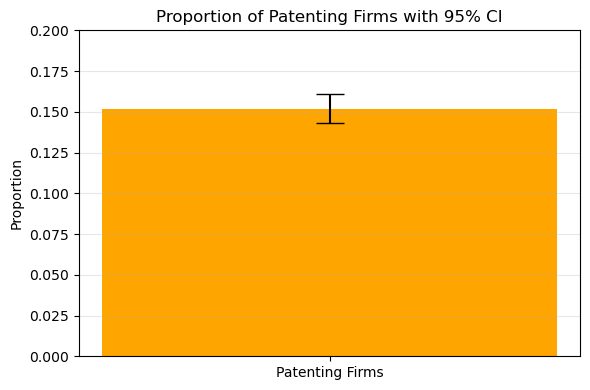

In [80]:
prop = 0.1519  # 15.19%
ci_prop = [0.1433, 0.1610]

plt.figure(figsize=(6,4))
plt.bar(['Patenting Firms'], [prop], yerr=[[prop-ci_prop[0]], [ci_prop[1]-prop]], capsize=10, color='orange')
plt.ylabel('Proportion')
plt.title('Proportion of Patenting Firms with 95% CI')
plt.ylim(0, 0.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

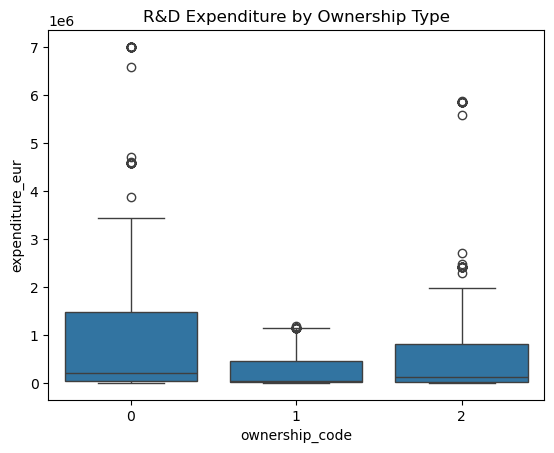

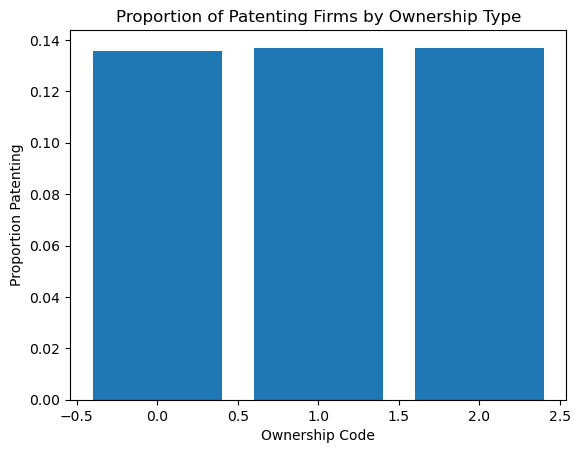

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: R&D expenditure by ownership
sns.boxplot(x='ownership_code', y='expenditure_eur', data=df)
plt.title("R&D Expenditure by Ownership Type")
plt.show()

# Barplot: Proportion of patenting firms by ownership
group_props = df.groupby('ownership_code')['is_patent'].mean().reset_index()
plt.bar(group_props['ownership_code'], group_props['is_patent'])
plt.title("Proportion of Patenting Firms by Ownership Type")
plt.xlabel("Ownership Code")
plt.ylabel("Proportion Patenting")
plt.show()

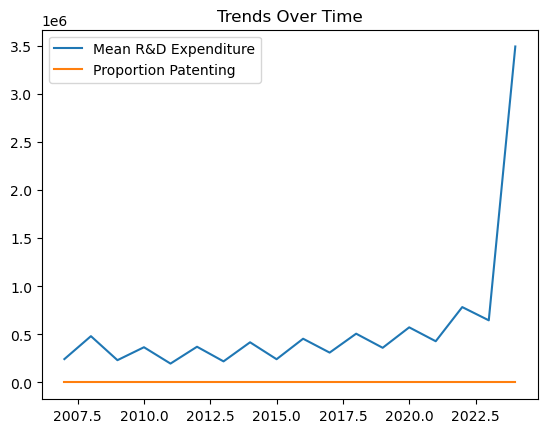

In [82]:
df_year = df.groupby('year').agg({'expenditure_eur':'mean', 'is_patent':'mean'}).reset_index()
plt.plot(df_year['year'], df_year['expenditure_eur'], label='Mean R&D Expenditure')
plt.plot(df_year['year'], df_year['is_patent'], label='Proportion Patenting')
plt.legend()
plt.title("Trends Over Time")
plt.show()

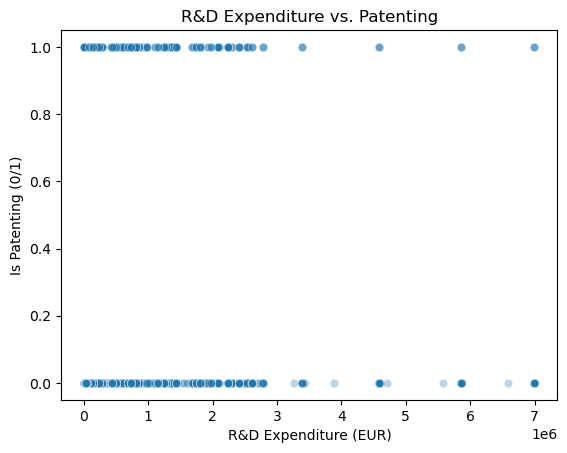

In [83]:
sns.scatterplot(x='expenditure_eur', y='is_patent', data=df, alpha=0.3)
plt.title("R&D Expenditure vs. Patenting")
plt.xlabel("R&D Expenditure (EUR)")
plt.ylabel("Is Patenting (0/1)")
plt.show()

In [84]:
import numpy as np
for code in df['ownership_code'].unique():
    group = df[df['ownership_code'] == code]['expenditure_eur'].dropna().values
    boot_means = [np.mean(np.random.choice(group, size=len(group), replace=True)) for _ in range(1000)]
    ci = np.percentile(boot_means, [2.5, 97.5])
    print(f"Ownership {code}: Mean = {np.mean(group):,.0f}, 95% CI = {ci[0]:,.0f} to {ci[1]:,.0f}")

Ownership 0: Mean = 852,153, 95% CI = 801,556 to 904,498
Ownership 1: Mean = 244,330, 95% CI = 229,746 to 258,399
Ownership 2: Mean = 509,470, 95% CI = 475,315 to 543,741


## Machine Learning: Dimensionality Reduction and Regression



In [ ]:
print("="*60)
print("ML Pipeline Summary")
print("="*60)
print(f"Best Linear Regression R² (test set): {model.score(X_test, y_test):.3f}")
print(f"Cross-validated R² (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"Random Forest R² (test set): {rf_score:.3f}")
print(f"Ridge Regression R² (test set): {ridge_score:.3f}")
print("\nKey findings:")
print("- PCA reduces dimensionality while preserving >95% variance in 5-6 components.")
print("- Linear regression on PCs explains most of the variance in the target.")
print("- Model coefficients and PC loadings help interpret the influence of original features.")
print("- Random Forest and Ridge can confirm or improve performance.")
print("="*60)

- **ML modeling** translates these insights into predictive and explanatory power, enabling robust policy evaluation and strategic forecasting, in line with the DTI’s mandate for evidence-based decision-making.

Through this structured, iterative approach, we bridge the gap between data and strategy, transforming Ireland’s innovation data into a compass for national policy and enterprise action.